In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tabula

In [15]:
def create_median_df(table_list, col_names):
    '''extract the median of each sample to a new column
    Args:
    - table_list: seq. of panda df
    - col_names: seq of str names
    
    return dataframe with median
    '''
    
    df = pd.DataFrame()
    for table, col in zip(table_list, col_names):
        df['median_'+ col] = table.median(1)
        df['std_' + col] = table.std(1)
    return df

In [16]:
def plot_corr(data):
    '''
    Plot correlation 
    
    Args:
    - data: pd dataframe
    
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(5, 5))
        ax = sns.heatmap(corr, square=True, cmap='RdBu_r', center=0)


In [17]:
magnetic_pdf = os.path.join(os.path.dirname(os.getcwd()), '../Data/Raw_data/MagneticMethods_Report.pdf')

In [18]:
tables = tabula.read_pdf(magnetic_pdf, pages=[10,11,12,13], lattice=True, pandas_options={'header':1})

In [19]:
hard_ref = tabula.read_pdf(magnetic_pdf, pages=[5], lattice=True)[0] #get the reference hardness table

In [12]:
hard_ref.to_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Hardness_ref.csv'))

In [20]:
#Cleaning tables
for i, df in enumerate(tables):
    df.drop(0, inplace=True)
    df.rename(columns = {'Unnamed: 0':'Sample'}, inplace=True)
    
    if i in range(6,9):
        df.Sample = df.Sample.str.replace('P91', 'T')
        
    if i >= 9:
        df.Sample = df.Sample.str.replace('B', 'T_B')
        
    df.Sample = df.Sample.str.replace('91', '')
    df.set_index(df.iloc[:,0], inplace=True, drop=True)
    df.drop('Sample', axis=1, inplace=True)


In [21]:
pipes = tables[0:6] # 1)ground (g) followed by 2)unground (ug) for coercive field (CF), permability (perm), MBN
tubes = tables[6:9] # CF, perm, MBN for first 3 = ID
B_tubes = tables[9:] # CF, perm, MBN for last 3 = Unknown

In [11]:
#Extracting CSV
table_names = ['PIPE_magnetic_CF_ground', 'PIPE_magnetic_CF_unground', 'PIPE_magnetic_Perm_ground', 'PIPE_magnetic_Perm_unground', 'PIPE_magnetic_MBN_ground', 'PIPE_magnetic_MBN_unground',\
              'TUBE_magnetic_CF', 'TUBE_magnetic_Perm', 'TUBE_magnetic_MBN', 'TUBE_blind_magnetic_CF', 'TUBE_blind_magnetic_Perm', 'TUBE_blind_magnetic_MBN']

for table, name in zip(tables, table_names):
    table.to_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Intermediate_data/'+name+'.csv'))
    

In [22]:
table_names_boxplot = ['CF_g', 'CF', 'perm_g', 'perm', 'pMBN_g', 'MBN',\
              'CF', 'perm', 'MBN', 'CF', 'perm', 'MBN']

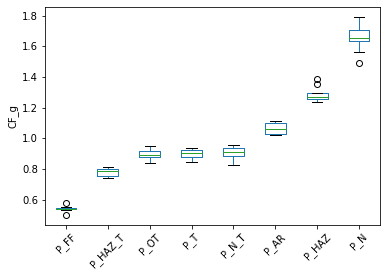

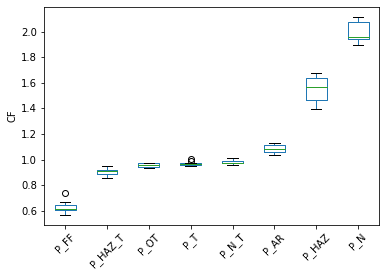

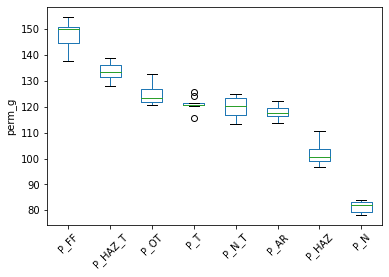

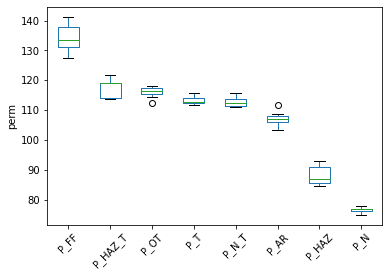

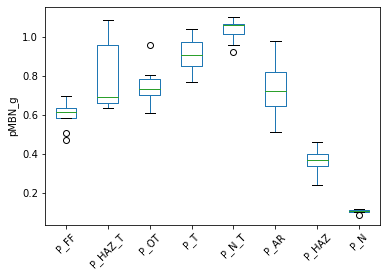

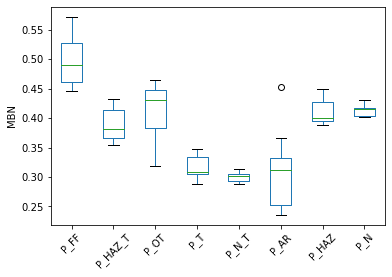

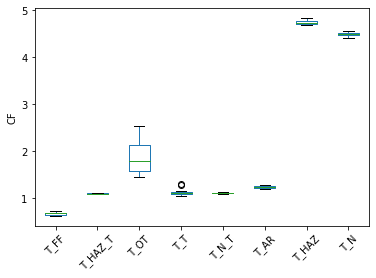

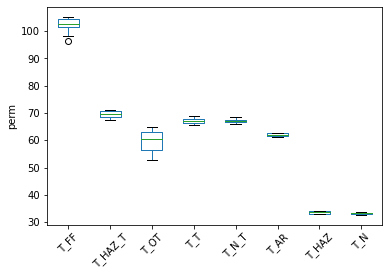

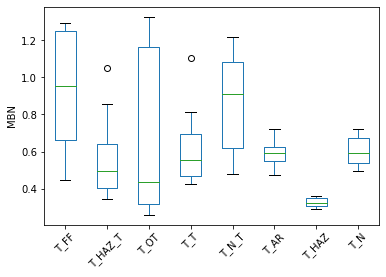

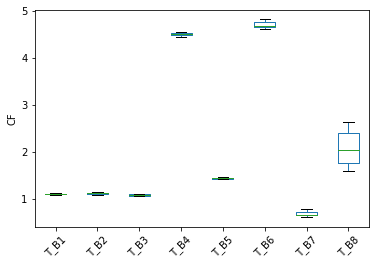

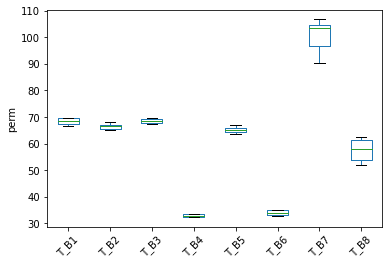

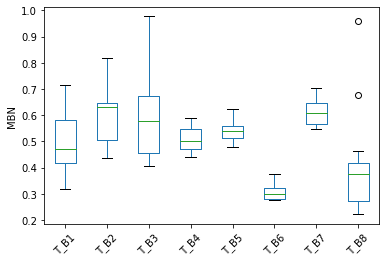

In [13]:
#boxplot
for table, name in zip(tables, table_names_boxplot):
    data = table.transpose().astype('float')
    data.plot.box(rot=45, ylabel=name)

In [23]:
column_tubes = table_names_boxplot[6:9]
median_tubes = create_median_df(tubes, column_tubes)
column_b_tubes = table_names_boxplot[9:]
median_b_tubes = create_median_df(B_tubes, column_b_tubes)
median_all_tubes = pd.concat([median_b_tubes, median_tubes], ignore_index=False)

In [24]:
median_all_tubes

,median_CF,std_CF,median_perm,std_perm,median_MBN,std_MBN
Sample,,,,,,
T_B1,1.1000,0.013418,68.50,1.115347,0.4730,0.127282
T_B2,1.1095,0.015721,66.45,0.890250,0.6305,0.110443
T_B3,1.0795,0.016489,68.40,0.770006,0.5765,0.178157
T_B4,4.5140,0.032860,32.90,0.434637,0.5005,0.052547
T_B5,1.4290,0.017591,64.95,1.173882,0.5380,0.042655
T_B6,4.6720,0.068887,34.05,0.881218,0.3010,0.030725
T_B7,0.6580,0.059461,103.55,6.020103,0.6075,0.052569
T_B8,2.0400,0.372001,57.80,3.940835,0.3745,0.223698
T_FF,0.6730,0.032451,102.80,2.866293,0.9525,0.310268


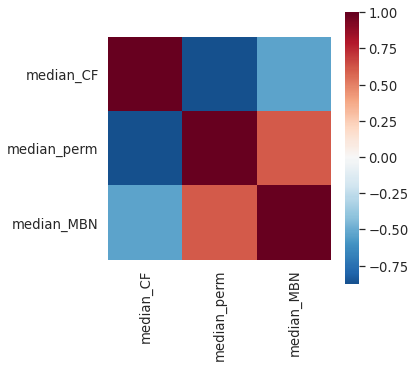

In [15]:
plot_corr(median_all_tubes)

In [25]:
median_all_tubes.to_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Cleaned_data/TUBE_magnetic_param_median.csv'))

In [26]:
column_pipes = table_names_boxplot[0:6]
median_pipes = create_median_df(pipes, column_pipes)

In [27]:
median_pipes

,median_CF_g,std_CF_g,median_CF,std_CF,median_perm_g,std_perm_g,median_perm,std_perm,median_pMBN_g,std_pMBN_g,median_MBN,std_MBN
Sample,,,,,,,,,,,,
P_FF,0.542,0.013395,0.616,0.052232,150.0,6.176092,133.6,4.608377,0.616,0.065481,0.490,0.044439
P_HAZ_T,0.784,0.027720,0.907,0.029813,133.6,3.299973,119.1,2.982688,0.690,0.138859,0.382,0.030821
P_OT,0.889,0.030757,0.957,0.012552,123.4,3.227117,116.5,1.825220,0.733,0.065356,0.430,0.048252
P_T,0.904,0.036911,0.964,0.019585,120.8,1.963552,112.8,1.003921,0.904,0.095680,0.309,0.019062
P_N_T,0.912,0.042264,0.976,0.018762,120.2,3.524607,112.4,1.180723,1.059,0.044122,0.301,0.008519
P_AR,1.060,0.035031,1.082,0.034083,117.8,2.824257,107.0,2.408319,0.721,0.165998,0.311,0.070260
P_HAZ,1.267,0.053067,1.568,0.096679,100.7,5.263876,86.9,3.197655,0.369,0.071125,0.401,0.020695
P_N,1.657,0.089474,1.959,0.076195,82.1,2.365677,76.9,1.035098,0.109,0.009438,0.415,0.008552


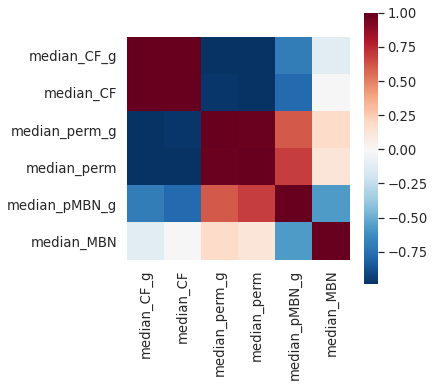

In [13]:
plot_corr(median_pipes)

In [28]:
median_pipes.to_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Cleaned_data/PIPE_magnetic_param_median.csv'))